# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, regularizers, optimizers, callbacks

In [2]:
#LOAD THE DATA
data = pd.read_csv('water_potability.csv')
print(data)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

Data Preprocessing

In [3]:
data.fillna(data.mean(), inplace=True)
X = data.drop("Potability", axis=1)
y = data["Potability"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Plot the Data Appropriately

In [4]:

#from sklearn import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.176, random_state=42
)

# Each Member Defines their model Here

In [6]:
#Model Definition by member 1
def model_prince_rurangwa():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],),
                           kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(32, activation='relu',
                           kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))

    optimizer = optimizers.RMSprop(learning_rate=0.001)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Start the training Process

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train: 0.687, Test: 0.679


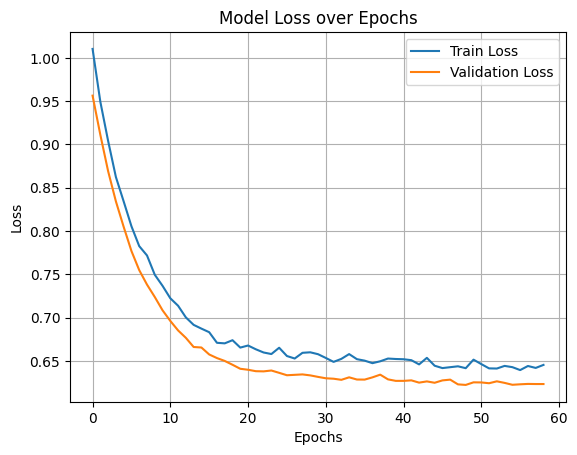

In [7]:
# Start the training process
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Create model instance
model = model_prince_rurangwa()

# Fit the model
history = model.fit(
    X_train_final, y_train_final,
    validation_data=(X_val, y_val),
    epochs=4000,
    verbose=0,
    callbacks=[early_stop]
)

# Evaluate the model
_, train_acc = model.evaluate(X_train_final, y_train_final, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Plot training history
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
#model-prince-rurangwa
# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Compute metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: %.3f" % test_acc)
print("Precision: %.3f" % precision)
print("Recall: %.3f" % recall)
print("F1 Score: %.3f" % f1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.679
Precision: 0.652
Recall: 0.323
F1 Score: 0.432


In [12]:
# Fit the model
history = model.fit(
    X_train_final, y_train_final,
    validation_data=(X_val, y_val),
    epochs=4000,
    verbose=0,
    callbacks=[early_stop]
)

# Evaluate the model
_, train_acc = model.evaluate(X_train_final, y_train_final, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 0.687, Test Accuracy: 0.681
